# TP2 - Sistemas Autónomos
#### "Monitorização de parâmetros ambientais para prática de desporto nas melhores condições"

## Import Libraries

In [1]:
import sys
import config
import firebase_admin
from firebase_admin import auth, credentials, firestore
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

## Get the Data


### Get the Database from Cloud Firestore

In [2]:
# Get the key
cred = credentials.Certificate(config.firestore_key)

# Initialize/Get the app
try:
    app = firebase_admin.initialize_app(cred)
except:
    app = firebase_admin.get_app()

# Get the database
db = firestore.client()

### Get the 'UV' collection


In [3]:
uv_ref = db.collection(u'UV')
docs = uv_ref.stream()

values_list = []

# falta tratar dos types de alguns parametros

for doc in docs:
    params = doc.to_dict()
    datetime = re.split(r'[-T:]',doc.id)
    values_list.append([int(datetime[0]),int(datetime[1]),int(datetime[2]),int(datetime[3]),int(datetime[4]),float(params['uv']),params['uv_time'],float(params['uv_max']),params['uv_max_time'],params['st1'],params['st2'],params['st3'],params['st4'],params['st5'],params['st6']])

uv_data = pd.DataFrame(values_list,columns=['year','month','day','hours','minutes','uv','uv_time','uv_max','uv_max_time','st1','st2','st3','st4','st5','st6'])

uv_data.head()

,year,month,day,hours,minutes,uv,uv_time,uv_max,uv_max_time,st1,st2,st3,st4,st5,st6
0,2020,4,3,1,0,0.0,2020-04-03T00:00:05.197Z,4.6729,2020-04-02T12:38:16.926Z,None,None,None,None,None,None


In [4]:
uv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         1 non-null      int64  
 1   month        1 non-null      int64  
 2   day          1 non-null      int64  
 3   hours        1 non-null      int64  
 4   minutes      1 non-null      int64  
 5   uv           1 non-null      float64
 6   uv_time      1 non-null      object 
 7   uv_max       1 non-null      float64
 8   uv_max_time  1 non-null      object 
 9   st1          1 non-null      object 
 10  st2          1 non-null      object 
 11  st3          1 non-null      object 
 12  st4          1 non-null      object 
 13  st5          1 non-null      object 
 14  st6          1 non-null      object 
dtypes: float64(2), int64(5), object(8)
memory usage: 248.0+ bytes


### Get the 'WM' collection

In [5]:
wm_ref = db.collection(u'WM')
docs = wm_ref.stream()

values_list = []

# general_weather tem que se meter em integer, mas temos que decidir se continuamos a extrair o "description" ou o "main" no momento do request

for doc in docs:
    params = doc.to_dict()
    datetime = re.split(r'[-T:]',doc.id)
    values_list.append([int(datetime[0]),int(datetime[1]),int(datetime[2]),int(datetime[3]),int(datetime[4]),float(params['feels_like'])-273.15,params['general_weather'],int(params['humidity']),int(params['pressure']),float(params['temp_max'])-273.15,float(params['temp_min'])-273.15,float(params['wind_speed'])])

wm_data = pd.DataFrame(values_list,columns=['year','month','day','hours','minutes','feels_like','general_weather','humidity','pressure','temp_max','temp_min','wind_speed'])

wm_data.head()

KeyError: 'wind_deg'

In [6]:
wm_data.info()

NameError: name 'wm_data' is not defined

### Get the 'AQ' collection

In [7]:
aq_ref = db.collection(u'AQ')
docs = aq_ref.stream()

values_list = []

for doc in docs:
    params = doc.to_dict()
    datetime = re.split(r'[-T:]',doc.id)
    values_list.append([int(datetime[0]),int(datetime[1]),int(datetime[2]),int(datetime[3]),int(datetime[4]),int(params['no2']),int(params['o3']),int(params['pm10'])])

aq_data = pd.DataFrame(values_list,columns=['year','month','day','hours','minutes','no2','o3','pm10'])

aq_data.head()

,year,month,day,hours,minutes,no2,o3,pm10
0,2020,4,3,1,0,12036,14351,13722


In [8]:
aq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   year     1 non-null      int64
 1   month    1 non-null      int64
 2   day      1 non-null      int64
 3   hours    1 non-null      int64
 4   minutes  1 non-null      int64
 5   no2      1 non-null      int64
 6   o3       1 non-null      int64
 7   pm10     1 non-null      int64
dtypes: int64(8)
memory usage: 192.0 bytes


## Exploratory Data Analysis

In [9]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

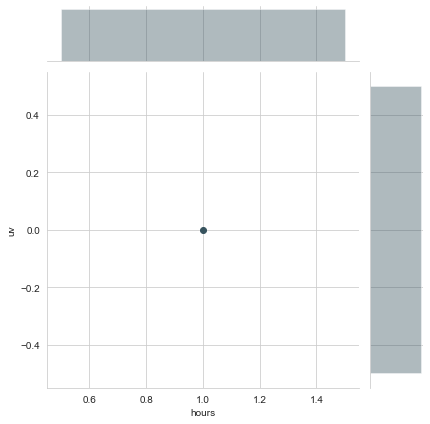

In [10]:
sns.jointplot(x='hours', y='uv', data=uv_data)


In [11]:
sns.jointplot(x='hours', y='feels_like', data=wm_data)


NameError: name 'wm_data' is not defined

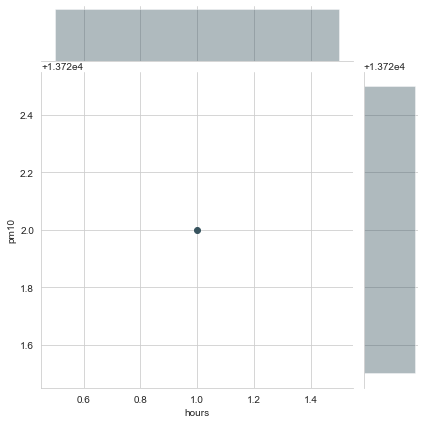

In [12]:
sns.jointplot(x='hours', y='pm10', data=aq_data)